In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
def read_train():
    train = pd.read_csv('train.csv')
    train['text'] = train['text'].astype(str)
    train['selected_text'] = train['selected_text'].astype(str)
    return train
def read_test():
    test = pd.read_csv('test.csv')
    test['text'] = test['text'].astype(str)
    return test

df_train = read_train()
df_test = read_test()

In [11]:
print("train shape : {}, test shape : {}".format(df_train.shape, df_test.shape))

train shape : (27481, 4), test shape : (3534, 3)


In [5]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [12]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


# 01. EDA

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   textID            27481 non-null  object
 1   text              27480 non-null  object
 2   selected_text     27480 non-null  object
 3   sentiment         27481 non-null  object
 4   text_wc           27481 non-null  int64 
 5   selected_text_wc  27481 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


### word count (df_train)

In [31]:
df_train['text_wc'] = df_train.apply(lambda x : len(str(x['text']).split()), axis = 1)
df_train['selected_text_wc'] = df_train.apply(lambda x : len(str(x['selected_text']).split()), axis = 1)

In [43]:
df_train.head()

,textID,text,selected_text,sentiment,text_wc,selected_text_wc
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3


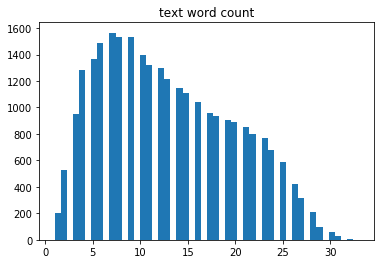

In [53]:
plt.hist(df_train['text_wc'], bins = 50)
plt.title('text word count')
plt.show()

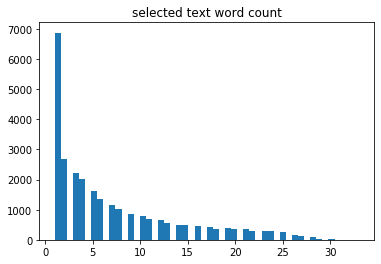

In [54]:
plt.hist(df_train['selected_text_wc'], bins = 50)
plt.title('selected text word count')
plt.show()

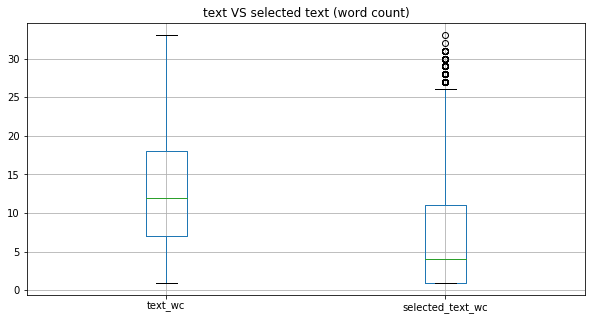

In [62]:
plt.figure(figsize=(10,5))
df_train.boxplot(column=['text_wc', 'selected_text_wc'])
plt.title('text VS selected text (word count)')
plt.show()

### label

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


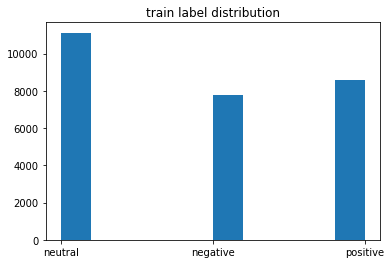

In [71]:
print(df_train['sentiment'].value_counts())
plt.hist(df_train['sentiment'])
plt.title('train label distribution')
plt.show()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64


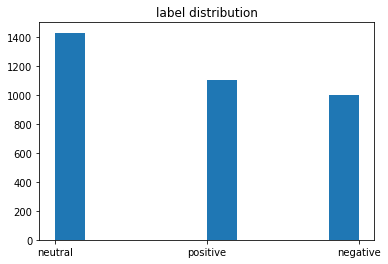

In [69]:
print(df_test['sentiment'].value_counts())
plt.hist(df_test['sentiment'])
plt.title('test label distribution')
plt.show()

sentiment
negative    13.473204
neutral     12.342867
positive    13.109881
Name: text_wc, dtype: float64


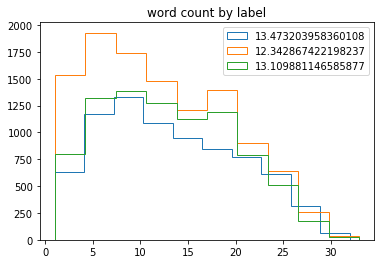

In [88]:
print(df_train.groupby('sentiment')['text_wc'].mean())
df_train.groupby('sentiment')['text_wc'].apply(lambda x : plt.hist(x, histtype = 'step', label = '{}'.format(x.mean())))
plt.title('word count by label')
plt.legend()
plt.show()

sentiment
negative     3.957975
neutral     12.068538
positive     3.519343
Name: selected_text_wc, dtype: float64


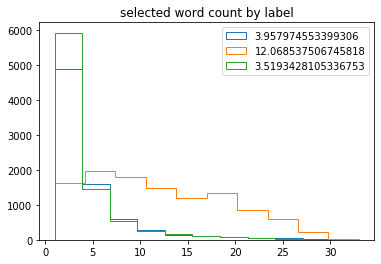

In [100]:
print(df_train.groupby('sentiment')['selected_text_wc'].mean())
df_train.groupby('sentiment')['selected_text_wc'].apply(lambda x : plt.hist(x, histtype = 'step', label = '{}'.format(x.mean())))
plt.title('selected word count by label')
plt.legend()
plt.show()

- `positive`: 정답에 단문이 차지하는 비중이 많다. 
- `neutral`: 정답이 긴 경우도 많다.

### most frequent word by label

- `_word` : 공백 기준 split 
- `_token` : word piece tokenizer 사용 (stopword 많이 나오긴 한다.)

> kernel에서는 stopword 제외하고 content word만 가지고 빈도 구했는데 나는 stopword도 포함함.

In [7]:
import tokenizers
from collections import Counter
tokenizer = tokenizers.BertWordPieceTokenizer("./bert/vocab.txt", lowercase = True)

`positive`

In [34]:
pos_selected_word = df_train.loc[df_train.sentiment == 'positive']['selected_text'].apply(lambda x : str(x).split()).sum()
pos_selected_token = df_train.loc[df_train.sentiment == 'positive']['selected_text'].apply(lambda x : tokenizer.encode(str(x)).tokens[1:-1]).sum()

pw = Counter(pos_selected_word)
pt = Counter(pos_selected_token)

In [37]:
print(pw.most_common(30))

[('I', 684), ('to', 594), ('a', 572), ('love', 556), ('good', 539), ('the', 522), ('you', 461), ('Happy', 371), ('i', 348), ('for', 276), ('my', 268), ('happy', 264), ('is', 260), ('great', 258), ('and', 247), ('it', 243), ('so', 227), ('day', 208), ('of', 205), ('fun', 197), ('nice', 192), ('thanks', 185), ('be', 176), ('was', 170), ('hope', 165), ('Good', 165), ('like', 158), ('Thanks', 153), ('with', 142), ('all', 141)]


In [38]:
print(pt.most_common(30))

[('.', 2255), ('!', 2159), ('i', 1224), ('`', 883), ('good', 849), ('happy', 735), ('love', 726), ('you', 714), (',', 658), ('to', 609), ('a', 595), ('the', 574), ('s', 490), ('day', 476), ('it', 448), ('thanks', 445), ('great', 366), ('fun', 305), ('my', 290), ('for', 288), ('*', 282), ('is', 275), ('nice', 274), ('so', 271), ('and', 270), ('hope', 248), ('awesome', 247), ('that', 237), ('##y', 221), ('t', 211)]


`negative`

In [41]:
neg_selected_word = df_train.loc[df_train.sentiment == 'negative']['selected_text'].apply(lambda x : str(x).split()).sum()
neg_selected_token = df_train.loc[df_train.sentiment == 'negative']['selected_text'].apply(lambda x : tokenizer.encode(str(x)).tokens[1:-1]).sum()

nw = Counter(neg_selected_word)
nt = Counter(neg_selected_token)

In [43]:
print(nw.most_common(30))

[('I', 854), ('to', 583), ('the', 508), ('my', 463), ('i', 462), ('a', 457), ('is', 347), ('miss', 337), ('not', 334), ('so', 296), ('me', 255), ('in', 245), ('I`m', 243), ('and', 237), ('it', 235), ('****', 231), ('sad', 224), ('of', 209), ('you', 200), ('hate', 199), ('that', 194), ('bad', 192), ('sorry', 181), ('for', 160), ('have', 160), ('like', 155), ('don`t', 152), ('feel', 149), ('no', 143), ('be', 140)]


In [44]:
print(nt.most_common(30))

[('.', 3118), ('i', 1742), ('*', 1343), ('!', 1282), ('`', 1253), ('t', 626), ('to', 596), (',', 591), ('the', 547), ('my', 529), ('a', 475), ('it', 440), ('not', 409), ('so', 381), ('is', 378), ('miss', 368), ('m', 367), ('sad', 366), ('me', 329), ('sorry', 301), ('that', 300), ('s', 271), ('in', 269), ('you', 265), ('and', 259), ('no', 255), ('bad', 252), ('can', 238), ('##t', 235), ('hate', 234)]


`neutral`

In [48]:
neu_selected_word = df_train.loc[df_train.sentiment == 'neutral']['selected_text'].apply(lambda x : str(x).split()).sum()
neu_selected_token = df_train.loc[df_train.sentiment == 'neutral']['selected_text'].apply(lambda x : tokenizer.encode(str(x)).tokens[1:-1]).sum()

nnw = Counter(neu_selected_word)
nnt = Counter(neu_selected_token)

In [50]:
print(nnw.most_common(30))

[('to', 4013), ('I', 3304), ('the', 3273), ('a', 2398), ('my', 1772), ('and', 1680), ('i', 1488), ('in', 1480), ('you', 1411), ('for', 1385), ('is', 1337), ('of', 1197), ('it', 1158), ('on', 1139), ('have', 926), ('but', 890), ('me', 821), ('with', 785), ('that', 766), ('at', 737), ('be', 731), ('just', 688), ('so', 642), ('was', 617), ('not', 616), ('I`m', 588), ('get', 587), ('out', 510), ('go', 493), ('up', 493)]


In [51]:
print(nnt.most_common(30))

[('.', 12886), ('i', 6144), ('!', 4559), ('`', 4293), ('to', 4118), ('the', 3502), (',', 3268), ('a', 2518), ('?', 2084), ('my', 2011), ('it', 2007), ('you', 1932), ('and', 1842), ('in', 1601), ('t', 1568), ('is', 1488), ('for', 1415), ('/', 1356), ('s', 1322), ('*', 1281), ('on', 1271), ('of', 1226), ('but', 1133), ('me', 1130), ('that', 1097), ('have', 998), ('-', 981), ('##s', 922), ('just', 899), ('at', 833)]


### most frequent word (bi-gram and tri-gram): *`positive`를 중심으로 볼 필요가 있음. (`positive`는 짧은 단어로 뽑아지기 때문에)*

### html, url, punctuation이 'selected text'에 존재?
ex. \*********** -> `negative`

### 남이 해논 EDA & Insights
[kernel1](https://www.kaggle.com/doomdiskday/full-tutorial-eda-to-dnns-all-you-need)

- A lot (>50%) of the selected text for the neutral post replicate exactly the text.
- The same insight applies for all the tweets having a lenght of at most 3 words. -> *preprocessing*

------

# 02. metrics

In [91]:
def jaccard(str1, str2): 
    a = set(str(str1).lower().split()) 
    b = set(str(str2).lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [93]:
df_train['score'] = df_train.apply(lambda x : jaccard(x['text'], x['selected_text']), axis = 1)

In [94]:
df_train.head()

,textID,text,selected_text,sentiment,text_wc,selected_text_wc,score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,0.214286


In [96]:
df_train[['text_wc', 'score', 'selected_text_wc']].corr()

,text_wc,score,selected_text_wc
text_wc,1.000000,-0.208826,0.449536
score,-0.208826,1.000000,0.678037
selected_text_wc,0.449536,0.678037,1.000000


sentiment
negative    0.338613
neutral     0.976447
positive    0.314372
Name: score, dtype: float64


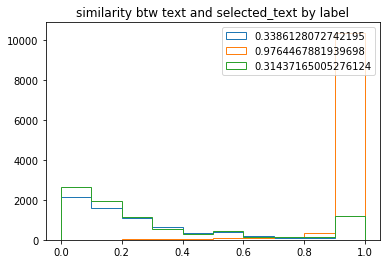

In [101]:
print(df_train.groupby('sentiment')['score'].mean())
df_train.groupby('sentiment')['score'].apply(lambda x : plt.hist(x, histtype = 'step', label = '{}'.format(x.mean())))
plt.title('similarity btw text and selected_text by label')
plt.legend()
plt.show()


### [text와 selected_text의 유사도]
- `neutral`: text와 selected_text의 유사도가 매우 높다. (mean = 0.97)
- `negative` > `positive`: 유사도 비슷 (mean: 0.33 > 0.31)
------
> **1. `neutral`의 정답은 거의 문장 전체인 경우가 많다. (의미 없는 tweet일 경우는 neutral 취급 -> 정답은 원문 그대로: 점수 높이기위한 post-processing trick!)** 
>
> **2. `positive`의 정답은 단문인 경우가 많다.**

In [132]:
df_neu = df_train.loc[df_train.sentiment == 'neutral']
print("중립 sentiment 중 정답이 tweet 본문 그대로인 퍼센트 {:.2f}%".format(df_neu.loc[df_neu.text == df_neu.selected_text].shape[0] / df_neu.shape[0] * 100))


중립 sentiment 중 정답이 tweet 본문 그대로인 퍼센트 53.35%


# 03. Preprocessing

### 03.01 Data Cleansing
> **정답 (`selected text`가 dirty한 상태. 그래서 preprocessing 필요성이 적다. 따라서 Bert-based model 써야함.)**


- stopwords 
- punctuations (특히 `,`, `...`, `***` 등 처리) 
- lower-casing
- URL, HTML, emoji removing (-> **정답에 포함되는 지 안되는지 확인해볼 것!**)
- word count threshold *(3 words?!) <- EDA 참고한 것*

### 03.02 Tokenization
1. nltk tokenization
2. word piece tokenization: lower-casing + 더 잘게 쪼갬

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import os
import sys
nltk.data.path.append(os.path.abspath('../Downloads/')) # adding my own path 
# nltk.download('punkt','../Downloads/')


In [9]:
tokens = pd.concat([df_train['text'].apply(lambda x : word_tokenize(x)),df_train['text'].apply(lambda x : tokenizer.encode(x).tokens[1:-1])], axis = 1)
tokens.columns = ['nltk', 'word_piece']

In [10]:
tokens['nltk_cnt'] = tokens.apply(lambda x : len(x['nltk']), axis = 1)
tokens['word_piece_cnt'] = tokens.apply(lambda x : len(x['word_piece']), axis = 1)

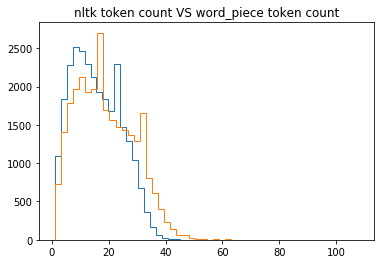

In [106]:
plt.hist(tokens['nltk_cnt'], histtype='step', bins = 50)
plt.hist(tokens['word_piece_cnt'], histtype='step', bins = 50)
plt.title('nltk token count VS word_piece token count')
plt.show()

- word_piece tokenizer가 더 잘게 쪼갠다. 

In [11]:
tokens.head(20)

,nltk,word_piece,nltk_cnt,word_piece_cnt
0,"[I, `, d, have, responded, ,, if, I, were, going]","[i, `, d, have, responded, ,, if, i, were, going]",10,10
1,"[Sooo, SAD, I, will, miss, you, here, in, San,...","[soo, ##o, sad, i, will, miss, you, here, in, ...",13,14
2,"[my, boss, is, bullying, me, ...]","[my, boss, is, bullying, me, ., ., .]",6,8
3,"[what, interview, !, leave, me, alone]","[what, interview, !, leave, me, alone]",6,6
4,"[Sons, of, ****, ,, why, couldn, `, t, they, p...","[sons, of, *, *, *, *, ,, why, couldn, `, t, t...",17,20
5,"[http, :, //www.dothebouncy.com/smf, -, some, ...","[http, :, /, /, www, ., dot, ##he, ##bo, ##un,...",14,29
6,"[2am, feedings, for, the, baby, are, fun, when...","[2a, ##m, feeding, ##s, for, the, baby, are, f...",14,17
7,"[Soooo, high]","[soo, ##oo, high]",2,3
8,"[Both, of, you]","[both, of, you]",3,3
9,"[Journey, !, ?, Wow, ..., u, just, became, coo...","[journey, !, ?, wow, ., ., ., u, just, became,...",19,24


In [113]:
df_train.iloc[14,:]

textID                           bbe3cbf620
text             test test from the LG enV2
selected_text    test test from the LG enV2
sentiment                           neutral
Name: 14, dtype: object

In [21]:
# max seq len for tweets
print(tokens['word_piece_cnt'].describe())
tokens.loc[tokens['word_piece_cnt'] > 96]

count    27481.000000
mean        18.712893
std         10.083452
min          1.000000
25%         10.000000
50%         18.000000
75%         26.000000
max        108.000000
Name: word_piece_cnt, dtype: float64


,nltk,word_piece,nltk_cnt,word_piece_cnt
3293,"[Legend, of, Inotia, ?, ?, ?, ?, ?, ?, ?, ?, ?...","[legend, of, in, ##ot, ##ia, ?, ?, ?, ?, ?, ?,...",106,108


- max_len = 96 (96 넘는 데이터 1개밖에 없다. 따라서 저 한개 삭제하고 train?!)

# 04. Conclusion

- `selected_text`가 지저분(puctuation, url, 등 포함)한 것으로 보아 bert-based model 사용해야 한다. 
- `neutral`은 50% 이상이 `selected_text`와 `text`가 동일하다. 따라서 post-processing 해서 스코어 올려야 한다. 